# PYTHON DRIVING LICENSE PROJECT

## IMPORT PYTHON LIBRARIES

In [2]:
import ifcopenshell
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

## READING EXCEL INPUT FILE

1. Definition of the Excel worksheet name:
    - The variable name is defined with the name of the Excel worksheet from which to extract the data. In your case, the name of the Excel worksheet is "STRATO DI MURATURA".
2. Definition of the Excel file path:
    - The variable path is defined with the path where the Excel files are located.
3. List of Excel files in the folder:
    - The glob.glob() function is used to obtain a list of all files with the ".xlsm" extension in the folder specified by the path variable.
    - An empty list file_list is defined to store the names of the found Excel files.
4. Reading the Excel files and creating a list of DataFrames:
    - An empty list excl_list is defined to store the DataFrames of the read Excel files.
    - A for loop is used to iterate through each file in the file_list.
    - The pd.read_excel() function is used to read the Excel file specified by the file name and worksheet name (sheet_name).
    - The DataFrame of the Excel file is added to the excl_list.
5. Merging the DataFrames:
    - A new empty DataFrame excl_merged is created to store the final result of the merge.
    - A for loop is used to iterate through each DataFrame in the excl_list.
    - The pd.concat() function is used to merge the current DataFrame with excl_merged, ignoring the row indices (ignore_index=True).
6. Exporting the merged DataFrame to a new Excel file:
    - A new path path_new is defined where the new Excel file will be saved.
    - The to_excel() method is used to export the excl_merged DataFrame to an Excel file in the specified path, with the name "_ALL DESTR OP-LV.xlsx" and without including the row index (index=False).

The entire process combines the data from the specified Excel worksheets into a single DataFrame and exports it to a new Excel file. It also plays a brief alert sound to indicate the completion of the operation.

In [3]:
#open excel file 
path = "C:/Users/jacop/OneDrive - Politecnico di Milano/2_Corsi Di Dottorato/202306_PYTHON/Project/Single Files/"

# csv files in the path
file_list = glob.glob(path + "*.xlsm")
 
# list of excel files we want to merge.
excl_list = []
 
for file in file_list:
    excl_list.append(pd.read_excel(file, sheet_name="DESTR_OPERE LAVORO")) # cambia con nome del foglio in cui si trovano i dati da unire (esempio tutti i fogli "DESTR RM", "DESTR RM_COMPONENTE", "CONVALIDE RM")
     
#print(file_list)
#print(excl_list)

# Check if the list contains files
if len(excl_list) > 0:
    # create a new dataframe to store the merged excel file.
    excl_merged = pd.DataFrame()

    for excl_file in excl_list:
        # appends the data into the excl_merged dataframe.
        #excl_merged = excl_merged.concat(excl_file, ignore_index=True)
        excl_merged = pd.concat([excl_merged, excl_file], ignore_index=True)

    # exports the dataframe into excel file with specified name.
    path_new = "C:/Users/jacop/OneDrive - Politecnico di Milano/2_Corsi Di Dottorato/202306_PYTHON/Project/"

    excl_merged.to_excel(path_new+"_ALL DESTR OP-LV.xlsx", index=False)
    print("Unione dei file Excel completata con successo.")
else:
    print("Nessun file Excel da unire trovato nella cartella specificata.")

    
import winsound
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

C:\Users\jacop\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\jacop\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


Unione dei file Excel completata con successo.


### DATAFRAME READING

I read the specific excel file and in particular only the declaratory columns

In [4]:
dati = pd.read_excel(path_new+"_ALL DESTR OP-LV.xlsx", usecols="B:G")
dati

,CODICE PREZZARIO 2023,DECLARATORIA PREZZARIO 2023,CODICE REGIONE OC,DECLARATORIA REGIONE OPERA COMPIUTA,CODICE REGIONE OP-LV,DECLARATORIA REGIONE OPERA-LAVORO
0,1C.04.010.0030.a,"Murature in conglomerato cementizio, entro e f...",NaN,OPERA: Strato di muratura di conglomerato ceme...,OP.C.01.01.M0001.0000.a,OPERA: Strato di muratura di conglomerato ceme...
1,NaN,NaN,NaN,NaN,xx.x.xx.xx.FALSO.0000.a,LAVORO: Getto. Incluso: vibratura. Escluso: es...
2,1C.04.010.0030.b,"Murature in conglomerato cementizio, entro e f...",CODICE OC,OPERA: Strato di muratura di conglomerato ceme...,OP.C.01.01.M0001.0000.b,OPERA: Strato di muratura di conglomerato ceme...
3,NaN,NaN,NaN,NaN,xx.x.xx.xx.FALSO.0000.b,LAVORO: Getto. Incluso: vibratura. Escluso: es...
4,1C.04.015.0030.a,"Murature armate entro e fuori terra, realizzat...",CODICE OC,OPERA: Strato di muratura; armata di conglomer...,OP.C.01.01.M0001.0005.a,OPERA: Strato di muratura; armata di conglomer...
...,...,...,...,...,...,...
859,NaN,NaN,NaN,NaN,CODICE LV,LAVORO: Posa. Incluso: oneri di fissaggio a pa...
860,1C.12.090.0020.e,Fornitura e Posa di tubo fonoassorbente con do...,CODICE OC,"OPERA: Tubazioni di scarico, tubi fonoassorben...",CODICE OP,"OPERA: Tubazioni di scarico, tubi fonoassorben..."
861,NaN,NaN,NaN,NaN,CODICE LV,LAVORO: Posa. Incluso: oneri di fissaggio a pa...
862,1C.12.090.0020.f,Fornitura e Posa di tubo fonoassorbente con do...,CODICE OC,"OPERA: Tubazioni di scarico, tubi fonoassorben...",CODICE OP,"OPERA: Tubazioni di scarico, tubi fonoassorben..."


Verification of the present data by reading the first line of the file

In [5]:
dati = pd.read_excel(path_new+"_ALL DESTR OP-LV.xlsx")
dati= dati.iloc[:1]
dati

,ID FORMULE,CODICE PREZZARIO 2023,DECLARATORIA PREZZARIO 2023,CODICE REGIONE OC,DECLARATORIA REGIONE OPERA COMPIUTA,CODICE REGIONE OP-LV,DECLARATORIA REGIONE OPERA-LAVORO,GENERE,FAMIGLIA,CATEGORIA,...,INCLUSO,ESCLUSO,SPECIFICHE TECNICHE,NOTE,SOVRAPPREZZO,PREZZO UNITARIO,OMNICLASS,UNICLASS,UNIFORMAT,IFC ENTITY
0,O_1C.04.010.0030.a,1C.04.010.0030.a,"Murature in conglomerato cementizio, entro e f...",NaN,OPERA: Strato di muratura di conglomerato ceme...,OP.C.01.01.M0001.0000.a,OPERA: Strato di muratura di conglomerato ceme...,OPERA,architettura,sistemi murari,...,nd,nd,murature entro e fuori terra,Tutti i calcestruzzi impiegati per la realizza...,NO,184.66,nd,nd,nd,nd


## CREATION OF OPEN BIM COST ENTITIES

1. Function Definitions:
    - costvalue(name, description, value): Creates and returns an IfcCostValue object with the specified name, description, and value.
    - costitem(name, description): Creates and returns an IfcCostItem object with the specified name and description.
    - relcost(name, description): Creates and returns an IfcRelAssignsToControl object with the specified name and description.
2. Data Loading:
    - The Excel file containing the data is opened using the pd.read_excel() method.
    - The "GENERE" column is filtered to include only rows with the value "OPERA".
3. Data Iteration:
    - Iteration is performed on each row of the DataFrame using the for loop index, row in dati.iterrows():.
    - The object, price, and price list code values are extracted from each row.
4. IFC File Creation for Cost Item:
    - A new ifc_file object is created using ifcopenshell.file() to represent an empty IFC file.
5. Generic Wall Entity Creation:
    - An IfcWall object named wall is created using the ifc_file.createIfcWall() method.
    - The name of the wall entity is set using the "OGGETTO" attribute from the DataFrame.
6. IfcCostItem and IfcCostValue Entity Creation:
    - Values for the name, description, and value of the IfcCostValue object are created based on the wall entity.
    - The costvalue_obj object is created using the costvalue() function with the appropriate values.
    - The cost object is created using the costitem() function with the appropriate name and description.
    - costvalue_obj is assigned as the cost value to cost using the CostValues attribute.
7. Creation of the Relation between Cost Item and Wall Entity:
    - An IfcRelAssignsToControl object named relass_to is created using the relcost() function.
    - The RelatedObjects attribute of relass_to is set to [wall] to indicate that the wall entity is connected.
    - The RelatingControl attribute of relass_to is set to cost to indicate that cost is the associated control.
8. Printing the Results:
    - The cost, cost value, and newly created relation are printed for the control.
9. Saving the IFC File:
    - The path to save the IFC file is specified using the path variable.
    - The ifc_file.write() method is used to write the content of the ifc_file object to the IFC file at the specified path.

The entire process is repeated for each row in the DataFrame, creating a new IFC file for each generic wall entity.

In [6]:
# Total list of objects present
dati = pd.read_excel(path_new+"_ALL DESTR OP-LV.xlsx")
dati= dati.loc[:, ["GENERE", "OGGETTO"]]
# Filter the "GENERE" column to include only rows with the value "OPERA".
dati = dati.loc[dati["GENERE"] == "OPERA"]
#print(dati)

# Print list of all entities
for index, row in dati.iterrows():
    entity = row["OGGETTO"]
    print(entity)
    
    

strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di muratura
strato di mu

In [7]:
# Calculate the total number of non-null values in the column "OGGETTO"
total_count = dati["OGGETTO"].notna().sum()

# Print the total number of non-null values
print("Total cost items without NaN value in the 'OGGETTO' column:", total_count)

Total cost items without NaN value in the 'OGGETTO' column: 431


In [8]:
# Get the list of unique values in the column "OGGETTO"
valori_univoci = dati["OGGETTO"].unique()

# Print the list of unique values
for valore in valori_univoci:
    print(valore)

strato di muratura
nan
tubazioni di scarico


In [9]:
# Create a new DataFrame with two columns: "Value" and "Condition"
nuovo_dati = pd.DataFrame({"Valore": valori_univoci})

# Add the second "Condition" column with the specified conditions
condizioni = []
for valore in valori_univoci:
    if valore == "strato di muratura":
        condizioni.append("IfcWall")
    elif pd.isna(valore):
        condizioni.append("nd")
    elif valore == "tubazioni di scarico":
        condizioni.append("IfcPipeSegment")
    else:
        condizioni.append("Altro valore")  # Add additional conditions if necessary

# Assign the "Condition" column to DataFrame
nuovo_dati["Condizione"] = condizioni

#print(nuovo_dati)

# Save the new DataFrame to Excel file
nuovo_dati.to_excel(path_new + "Conversion files OGGETTO-IFCCLASS.xlsx", index=False)
print("./done")

./done


In [10]:
#IfcCostValue
def costvalue(name, description, value):
    costvalue = ifc_file.createIfcCostValue()
    costvalue.Name = name
    costvalue.Description = description
    appliedvalue = ifc_file.createIfcReal(value)
    costvalue.AppliedValue = appliedvalue
    #unitbasis = input("Insert unit basis:")
    #costvalue.UnitBasis = unitbasis
    
    return costvalue

#IfcCostItem
def costitem(name, description):
    cost = ifc_file.createIfcCostItem()
    cost.GlobalId = ifcopenshell.guid.new()
    cost.Name = name
    cost.Description = description

    return cost

#IfcRelAssignToControl
def relcost(name, description):
    relass_to = ifc_file.createIfcRelAssignsToControl()
    relass_to.GlobalId = ifcopenshell.guid.new()
    relass_to.Name = name
    relass_to.Description = description
    
    return relass_to


# Open DataFrame with all data
dati = pd.read_excel(path_new+"_ALL DESTR OP-LV.xlsx")
dati= dati.loc[:, ["GENERE", "OGGETTO", "PREZZO UNITARIO", "CODICE PREZZARIO 2023"]]

# Filter the "GENERE" column to include only rows with the value "OPERA"
dati = dati.loc[dati["GENERE"] == "OPERA"]
#print(dati)

# Counter variable
total_files = 0

# Iterate for each row the indicated values (object, price, ...)
for index, row in dati.iterrows():
    entity = row["OGGETTO"]
    #print(entity)
    unitcost = row["PREZZO UNITARIO"]
    #print(unitcost)
    pricelistcode = row["CODICE PREZZARIO 2023"]
    #print(pricelistcode)
    
    #Strati di muratura
    if entity == "strato di muratura":
        #Create an IFC file for the cost item
        ifc_file = ifcopenshell.file()
        #Create a generic wall entity (1sqm wall example)
        wall = ifc_file.createIfcWall()
        wall.Name = entity #Define wall entity name based on price attribute
        print(wall)
        
        # Create an entity IfcCostItem and IfcCostValue
        costvalue_obj = costvalue("Cost of " + entity, "Cost of " + entity, unitcost)# unitcost recall unit price from DataFrame
        cost = costitem(entity, entity)
        cost.CostValues = [costvalue_obj] # Assign a list containing the value of costvalues

        # Create an entity of relation between IfcCostItem and IfcElement
        relass_to = relcost("Rel between cost and " + entity, "Rel between cost and " + entity)
        relass_to.RelatedObjects = [wall]
        relass_to.RelatingControl = cost

        # Print the cost item and the first and only associated cost value
        print(cost)
        print(cost.CostValues[0])
        print(relass_to)
        
        # Saving the IFC file
        path = "C:/Users/jacop/OneDrive - Politecnico di Milano/2_Corsi Di Dottorato/202306_PYTHON/Project/IfcCostItem/"
        ifc_file.write(path + pricelistcode + " - " + entity + ".ifc")
        
        # Increments the counter of files
        total_files += 1
        
    elif entity == "tubazioni di scarico":
        #Create an IFC file for the cost item
        ifc_file = ifcopenshell.file()
        #Create a generic pipe entity
        pipe = ifc_file.createIfcPipeSegment()
        pipe.Name = entity #definisco nome entità muro sulla base dell'attributo del prezzo
        print(pipe)
        
        # Create an entity IfcCostItem and IfcCostValue
        costvalue_obj = costvalue("Cost of " + entity, "Cost of " + entity, unitcost) # unitcost recall unit price from DataFrame
        cost = costitem(entity, entity)
        cost.CostValues = [costvalue_obj] # Assegna una lista contenente il valore di costvalues

        # Create an entity of relation between IfcCostItem and IfcElement    
        relass_to = relcost("Rel between cost and " + entity, "Rel between cost and " + entity)
        relass_to.RelatedObjects = [pipe]
        relass_to.RelatingControl = cost

        # Print the cost item and the first and only associated cost value
        print(cost)
        print(cost.CostValues[0])
        print(relass_to)
        
        # Saving the IFC file
        path = "C:/Users/jacop/OneDrive - Politecnico di Milano/2_Corsi Di Dottorato/202306_PYTHON/Project/IfcCostItem/"
        ifc_file.write(path + pricelistcode + " - " + entity + ".ifc")
        
        # Increments the counter of files
        total_files += 1

#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('2m0Vbu4ULC8RsYqTAK53ZH',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of strato di muratura',IfcReal(184.66),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('0olLDmiRH31R3ixe8PUfgL',$,'Rel between cost and strato di muratura','Rel between cost and strato di muratura',(#1),$,#3)
#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('1lXX6R5TfCmhS6QOiHLYzy',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of strato di muratura',IfcReal(204.31),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('1Ma0AgVB98X99tGSsXMieR',$,'Rel between cost and strato di muratura','Rel between cost and strato di muratura',(#1),$,#3)
#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('2MtU9Tx0X01fQcAyXSCbc7',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of

#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('0j8A93Jlb1F8AgrwmgKtD3',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of strato di muratura',IfcReal(86.68),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('3O1eeGT094aBDH30xqwSyI',$,'Rel between cost and strato di muratura','Rel between cost and strato di muratura',(#1),$,#3)
#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('2HgGDdLPf6Cg0kjaHfqfwD',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of strato di muratura',IfcReal(99.77),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('0G2ApXy9nAy93SCcLd_7m3',$,'Rel between cost and strato di muratura','Rel between cost and strato di muratura',(#1),$,#3)
#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('0$REy1NZjAT8NL660kYl7q',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of s

#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('0UpvAlZhf34QoOnFdqYA_X',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of strato di muratura',IfcReal(78.95),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('3htgZOYA94gR1uaGpPxPNX',$,'Rel between cost and strato di muratura','Rel between cost and strato di muratura',(#1),$,#3)
#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('1yFd9YnZz5whCeGvpXLKAH',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of strato di muratura',IfcReal(58.3),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('0bGHWOX8v9Cgp45lvMnZEA',$,'Rel between cost and strato di muratura','Rel between cost and strato di muratura',(#1),$,#3)
#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('1FMFfzanP8_uxcL0dcxboL',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of st

#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('0jXaqeXEP2HAG_b$cLeUYS',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of strato di muratura',IfcReal(161.69),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('0rKlJ_TPrFSQ3bZw85wtbM',$,'Rel between cost and strato di muratura','Rel between cost and strato di muratura',(#1),$,#3)
#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('2E3ldl2GfFCOGezOM0STYD',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of strato di muratura',IfcReal(115.91),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('3DBCoAp0D86fqOmkP6AZ8M',$,'Rel between cost and strato di muratura','Rel between cost and strato di muratura',(#1),$,#3)
#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('2y5DkmnTX2ZfdKqhv4fppj',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of

#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('3NPDzsPAnF3fLwxhb$9fw9',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of strato di muratura',IfcReal(35.75),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('3fKzo9dCn9Tx6AYOT3sV4u',$,'Rel between cost and strato di muratura','Rel between cost and strato di muratura',(#1),$,#3)
#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('2QPX6T9g93x8459yoZksyh',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of strato di muratura',IfcReal(36.88),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('19zFKB_GjAFOYI_GMJ0rQc',$,'Rel between cost and strato di muratura','Rel between cost and strato di muratura',(#1),$,#3)
#1=IfcWall($,$,'strato di muratura',$,$,$,$,$,$)
#3=IfcCostItem('2hhGH4AnLAwuliU9_K7lZg',$,'strato di muratura','strato di muratura',$,$,$,(#2),$)
#2=IfcCostValue('Cost of strato di muratura','Cost of s

#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('2OctVZVv54dR4jgF2iVS7l',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$)
#2=IfcCostValue('Cost of tubazioni di scarico','Cost of tubazioni di scarico',IfcReal(27.74),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('2hHjECd795y91dhc_WOZsI',$,'Rel between cost and tubazioni di scarico','Rel between cost and tubazioni di scarico',(#1),$,#3)
#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('16uCt5v8PFXQaEcRLBMZKv',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$)
#2=IfcCostValue('Cost of tubazioni di scarico','Cost of tubazioni di scarico',IfcReal(39.72),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('23B52bAEv0sve40puN5aSH',$,'Rel between cost and tubazioni di scarico','Rel between cost and tubazioni di scarico',(#1),$,#3)
#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('0BhSm914zCpf$zq3DBLzjW',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$)


#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('0481OEeDrAkAHdW3nb$iGa',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$)
#2=IfcCostValue('Cost of tubazioni di scarico','Cost of tubazioni di scarico',IfcReal(19.34),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('2GL0C1C4PC9R20dzfA7Qiv',$,'Rel between cost and tubazioni di scarico','Rel between cost and tubazioni di scarico',(#1),$,#3)
#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('0jgSuSAVvDXPzX4$TFz6Vh',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$)
#2=IfcCostValue('Cost of tubazioni di scarico','Cost of tubazioni di scarico',IfcReal(24.28),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('2l0oLN2ujBA8l5zjHAhiA0',$,'Rel between cost and tubazioni di scarico','Rel between cost and tubazioni di scarico',(#1),$,#3)
#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('0lVu0Il_X2gvM9HG5URhuD',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$)


#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('3tNO49zWf6CfLJGYtMc5$I',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$)
#2=IfcCostValue('Cost of tubazioni di scarico','Cost of tubazioni di scarico',IfcReal(278.71),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('1KKEs$MHnC1g01ThyCwB6h',$,'Rel between cost and tubazioni di scarico','Rel between cost and tubazioni di scarico',(#1),$,#3)
#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('3rOGWYP4bFpu1riR$CcP60',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$)
#2=IfcCostValue('Cost of tubazioni di scarico','Cost of tubazioni di scarico',IfcReal(405.44),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('0tuXwbr1P3yxkAypb5rMeH',$,'Rel between cost and tubazioni di scarico','Rel between cost and tubazioni di scarico',(#1),$,#3)
#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('0BzumkZG58F9hKx2glREUW',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$

#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('3Q$_UrqYv7$fwQVd2$GfOg',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$)
#2=IfcCostValue('Cost of tubazioni di scarico','Cost of tubazioni di scarico',IfcReal(32.01),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('3R7lBQ$_5AL8LdgzP3otxV',$,'Rel between cost and tubazioni di scarico','Rel between cost and tubazioni di scarico',(#1),$,#3)
#1=IfcPipeSegment($,$,'tubazioni di scarico',$,$,$,$,$,$)
#3=IfcCostItem('00MNkvwkH8$vGmk1YVAld3',$,'tubazioni di scarico','tubazioni di scarico',$,$,$,(#2),$)
#2=IfcCostValue('Cost of tubazioni di scarico','Cost of tubazioni di scarico',IfcReal(33.31),$,$,$,$,$,$,$)
#4=IfcRelAssignsToControl('0hPJ9oydLANRUz9VZ8XPb7',$,'Rel between cost and tubazioni di scarico','Rel between cost and tubazioni di scarico',(#1),$,#3)


In [11]:
# Print the total number of created files
print("Total IFC files created:", total_files)

Total IFC files created: 431


In [12]:
# Comparison between total_files and total_count
if total_files == total_count:
    print("Total IFC files = Total Cost Items")
else:
    print("Different Totals")

Total IFC files = Total Cost Items


In [13]:
# Read only "OGGETTO" and "IFC ENTITY" columns from Excel file 
#columns_to_read = ["CODICE PREZZARIO 2023", "GENERE", "OGGETTO", "IFC ENTITY"]
#dati = pd.read_excel(path_new+"_ALL DESTR OP-LV.xlsx", usecols=columns_to_read)
dati = pd.read_excel(path_new+"_ALL DESTR OP-LV.xlsx")

# Filter the "GENERE" column to include only the rows with the value "OPERA"
dati = dati.loc[dati["GENERE"] == "OPERA"]

# Update "IFC ENTITY" column for "masonry layer" with "ifcwall"
dati.loc[dati["OGGETTO"] == "strato di muratura", "IFC ENTITY"] = "IfcWall"

# Update the "IFC ENTITY" column for "waste pipes" with "IfcPipeSegment"
dati.loc[dati["OGGETTO"] == "tubazioni di scarico", "IFC ENTITY"] = "IfcPipeSegment"

#print(dati)

# Save the updated DataFrame to Excel file
dati.to_excel(path_new+"_ALL DESTR OP-LV_updated.xlsx", index=False)
print("./done")

./done


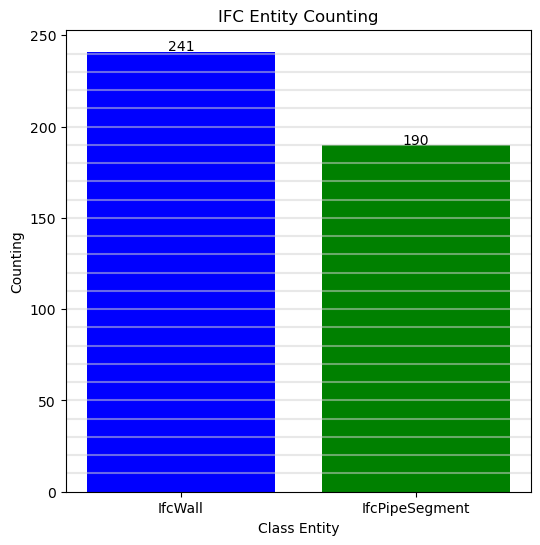

In [32]:
import matplotlib.pyplot as plt

# Entity counting
count_wall = dati["IFC ENTITY"].value_counts().get("IfcWall", 0)
count_pipe = dati["IFC ENTITY"].value_counts().get("IfcPipeSegment", 0)

labels = ["IfcWall", "IfcPipeSegment"]  # Aggiungi eventuali altre classi
values = [count_wall, count_pipe]  # Aggiungi eventuali altri valori
colors = ["blue", "green"]  # Colori personalizzati per le barre

# Create the figure for entity counting
fig, ax = plt.subplots(figsize=(6, 6))

# Create the bar plot for entity counting
ax.bar(labels, values, color=colors)
for i, value in enumerate(values):
    ax.text(i, value + 0.5, str(value), ha='center')
ax.set_xlabel("Class Entity")
ax.set_ylabel("Counting")
ax.set_title("IFC Entity Counting")
for i in range(10, max(values), 10):
    ax.axhline(i, color='lightgray', linestyle='-', alpha=0.5)

# Display the chart
plt.show()


C:\Users\jacop\AppData\Local\Temp\ipykernel_30136\516757832.py:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


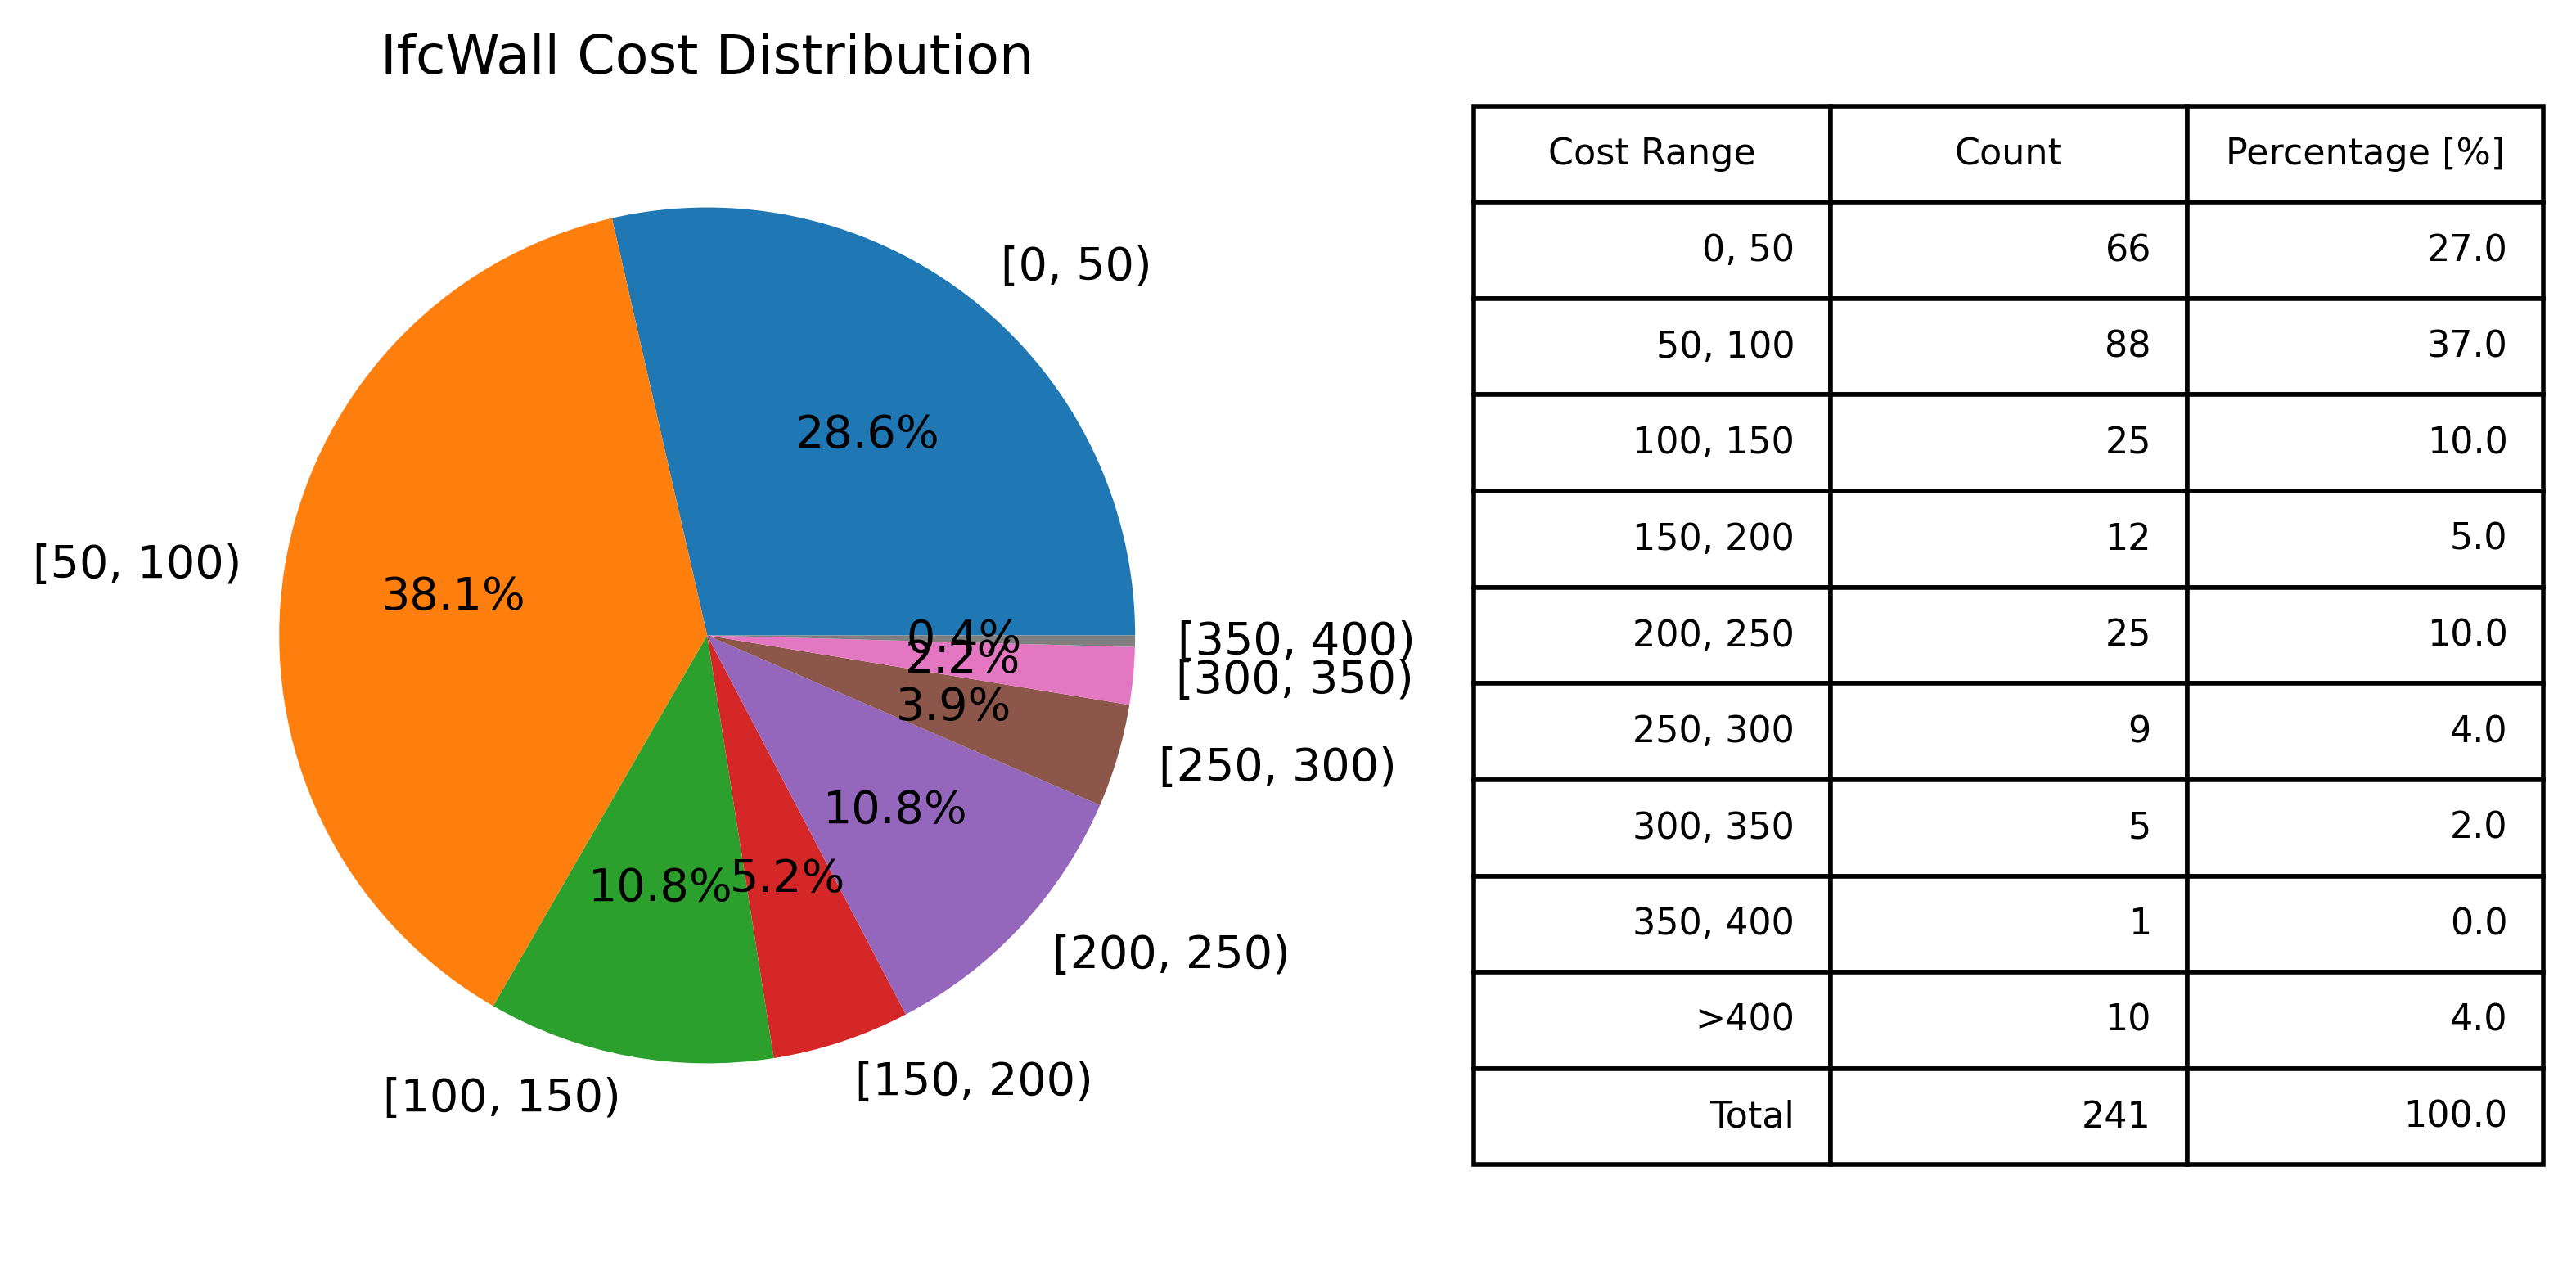

In [83]:
# Filter the data to include only relevant columns
filtered_data = dati[["IFC ENTITY", "PREZZO UNITARIO"]]

# Remove rows with NaN and "nd" values in PREZZO UNITARIO column
filtered_data = filtered_data.dropna(subset=["PREZZO UNITARIO"])
filtered_data = filtered_data[~filtered_data["PREZZO UNITARIO"].isin(["nd"])]

# Filter entities to include only "IfcWall"
filtered_data_wall = filtered_data[filtered_data["IFC ENTITY"] == "IfcWall"]

# Get the unit costs for IfcWall
unit_costs_wall = filtered_data_wall["PREZZO UNITARIO"]

# Calculate the total number of IfcWall elements
total_count = len(unit_costs_wall)

# Calculate the total cost for IfcWall
total_cost = unit_costs_wall.sum()

# Define the cost range bins
cost_bins = np.concatenate([np.arange(0, 400, 50), [400, np.inf]])

# Group the unit costs into bins
cost_groups = pd.cut(unit_costs_wall, bins=cost_bins)

# Count the number of elements in each cost group
cost_counts = cost_groups.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 4), dpi=400)
plt.pie(cost_counts, labels=[str(r)[1:].strip("()") for r in cost_counts.index], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("Distribution of Costs for IfcWall")


# Define the cost ranges
cost_ranges = pd.interval_range(start=0, end=400, freq=50, closed="left")

# Group the unit costs into the cost ranges
cost_groups = pd.cut(unit_costs_wall, cost_ranges)

# Count the number of elements in each cost range
cost_counts = cost_groups.value_counts().sort_index()

# Create a DataFrame to store the results
results_df = pd.DataFrame({"Cost Range": [str(r)[1:].strip("()") for r in cost_counts.index], "Count": cost_counts.values})

# Add a row for data above 400
above_400_count = (unit_costs_wall > 400).sum()
above_400_row = pd.DataFrame({"Cost Range": ">400", "Count": above_400_count}, index=[len(results_df)])
results_df = pd.concat([results_df, above_400_row], ignore_index=True)

# Add a row with the total count
total_count = len(unit_costs_wall)
total_row = pd.DataFrame({"Cost Range": "Total", "Count": total_count}, index=[len(results_df)])

# Concatenate the results and total row
results_df = pd.concat([results_df, total_row])

# Calculate the percentage on the total
results_df["Percentage [%]"] = (results_df["Count"] / total_count * 100).round(0)

# Reset the index
results_df = results_df.reset_index(drop=True)

# Create the pie chart
plt.subplot(1, 2, 1)
plt.pie(cost_counts, labels=cost_ranges, autopct='%1.1f%%')
plt.title("IfcWall Cost Distribution")

# Create the table
plt.subplot(1, 2, 2)
table = plt.table(cellText=results_df.values, colLabels=results_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)
plt.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the chart and table
plt.show()



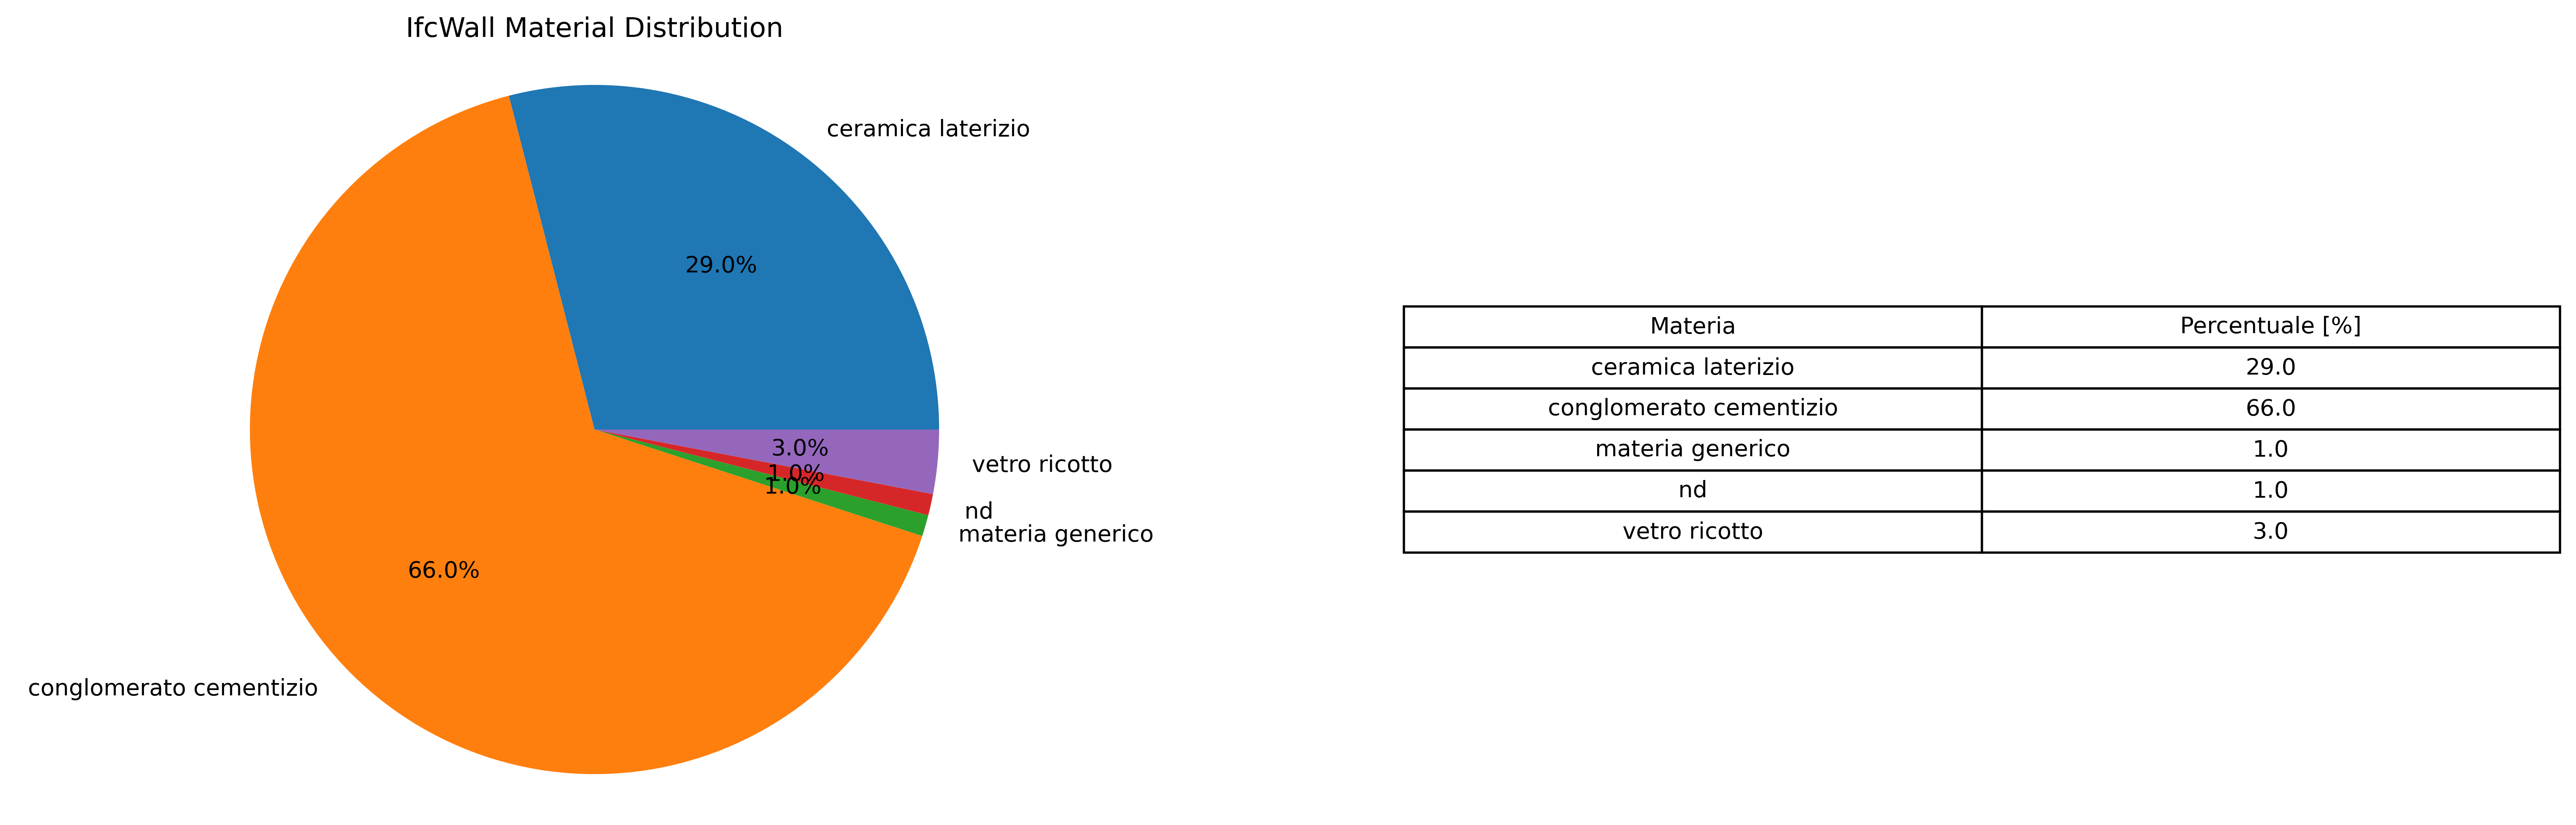

In [97]:
# Filter the data to include only relevant columns
filtered_data = dati[["IFC ENTITY", "MATERIA"]]

# Remove rows with NaN and "nd" values in PREZZO UNITARIO column
filtered_data = filtered_data.dropna(subset=["MATERIA"])
#filtered_data = filtered_data[~filtered_data["PREZZO UNITARIO"].isin(["nd"])]

# Filter entities to include only "IfcWall"
filtered_data_wall = filtered_data[filtered_data["IFC ENTITY"] == "IfcWall"]

# Get the material for IfcWall
material_wall = filtered_data_wall["MATERIA"]

grouped_materials = filtered_data_wall.groupby("MATERIA")

# Calcola il numero di occorrenze per ogni materiale
material_counts = grouped_materials.size()

# Calcola la percentuale di ogni materiale
material_percentages = ((material_counts / material_counts.sum()) * 100).round(0)

# Crea il DataFrame con i dati
df = pd.DataFrame({"Materia": material_percentages.index, "Percentuale [%]": material_percentages.values})

# Crea la griglia di subplot
plt.figure(figsize=(20, 6), dpi=400)

plt.subplot(1, 2, 1)  # Primo subplot nella prima colonna
plt.pie(material_percentages, labels=material_percentages.index, autopct='%1.1f%%')
plt.title("IfcWall Material Distribution")
plt.axis('equal')

plt.subplot(1, 2, 2)  # Secondo subplot nella seconda colonna
plt.axis('off')
tbl = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)

# Mostra il grafico e la tabella affiancati
plt.show()

C:\Users\jacop\AppData\Local\Temp\ipykernel_30136\3722524512.py:67: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


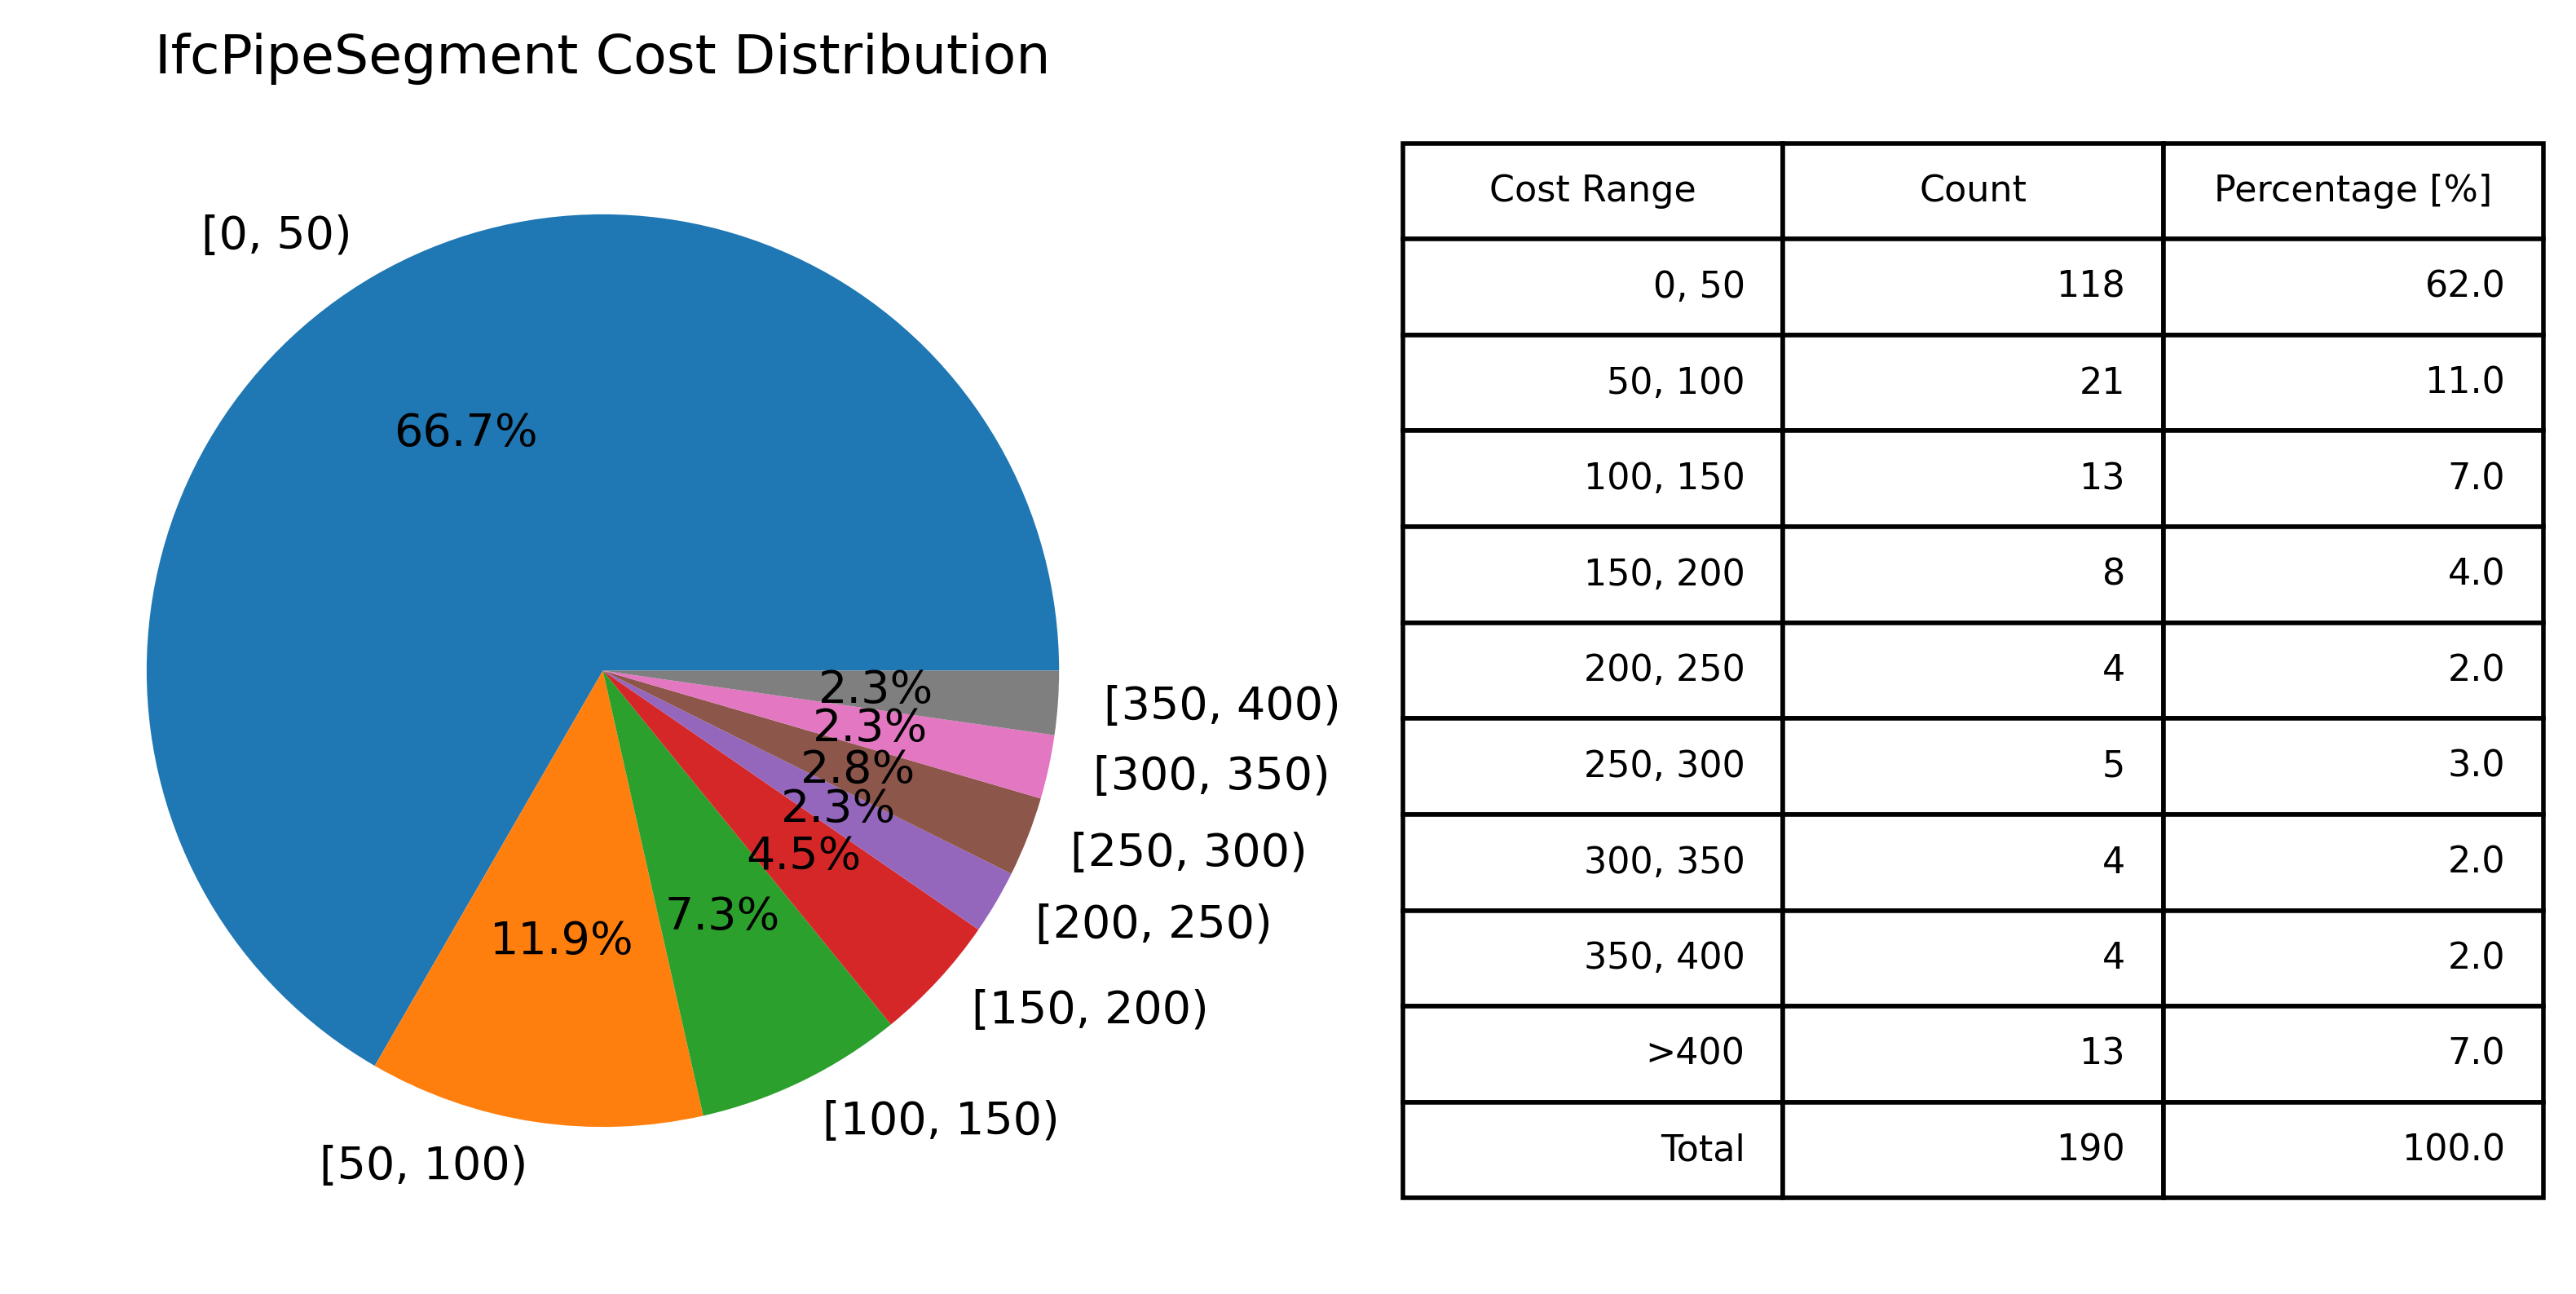

In [102]:
# Filter the data to include only relevant columns
filtered_data = dati[["IFC ENTITY", "PREZZO UNITARIO"]]

# Remove rows with NaN and "nd" values in PREZZO UNITARIO column
filtered_data = filtered_data.dropna(subset=["PREZZO UNITARIO"])
filtered_data = filtered_data[~filtered_data["PREZZO UNITARIO"].isin(["nd"])]

# Filter entities to include only "IfcPipeSegment"
filtered_data_pipe = filtered_data[filtered_data["IFC ENTITY"] == "IfcPipeSegment"]

# Get the unit costs for IfcWall
unit_costs_pipe = filtered_data_pipe["PREZZO UNITARIO"]

# Calculate the total number of IfcWall elements
total_count = len(unit_costs_pipe)

# Calculate the total cost for IfcWall
total_cost = unit_costs_pipe.sum()

# Define the cost range bins
cost_bins = np.concatenate([np.arange(0, 400, 50), [400, np.inf]])

# Group the unit costs into bins
cost_groups = pd.cut(unit_costs_pipe, bins=cost_bins)

# Count the number of elements in each cost group
cost_counts = cost_groups.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 4), dpi=400)
plt.pie(cost_counts, labels=None, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("Distribution of Costs for IfcPipeSegment")

# Define the cost ranges
cost_ranges = pd.interval_range(start=0, end=400, freq=50, closed="left")

# Group the unit costs into the cost ranges
cost_groups = pd.cut(unit_costs_pipe, cost_ranges)

# Count the number of elements in each cost range
cost_counts = cost_groups.value_counts().sort_index()

# Create a DataFrame to store the results
results_df = pd.DataFrame({"Cost Range": [str(r)[1:].strip("()") for r in cost_counts.index], "Count": cost_counts.values})

# Add a row for data above 400
above_400_count = (unit_costs_pipe > 400).sum()
above_400_row = pd.DataFrame({"Cost Range": ">400", "Count": above_400_count}, index=[len(results_df)])
results_df = pd.concat([results_df, above_400_row], ignore_index=True)

# Add a row with the total count
total_count = len(unit_costs_pipe)
total_row = pd.DataFrame({"Cost Range": "Total", "Count": total_count}, index=[len(results_df)])

# Concatenate the results and total row
results_df = pd.concat([results_df, total_row])

# Calculate the percentage on the total
results_df["Percentage [%]"] = (results_df["Count"] / total_count * 100).round(0)

# Reset the index
results_df = results_df.reset_index(drop=True)

# Create the pie chart
plt.subplot(1, 2, 1)
plt.pie(cost_counts, labels=cost_ranges, autopct='%1.1f%%')
plt.title("IfcPipeSegment Cost Distribution")

# Create the table
plt.subplot(1, 2, 2)
table = plt.table(cellText=results_df.values, colLabels=results_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)
plt.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the chart and table
plt.show()



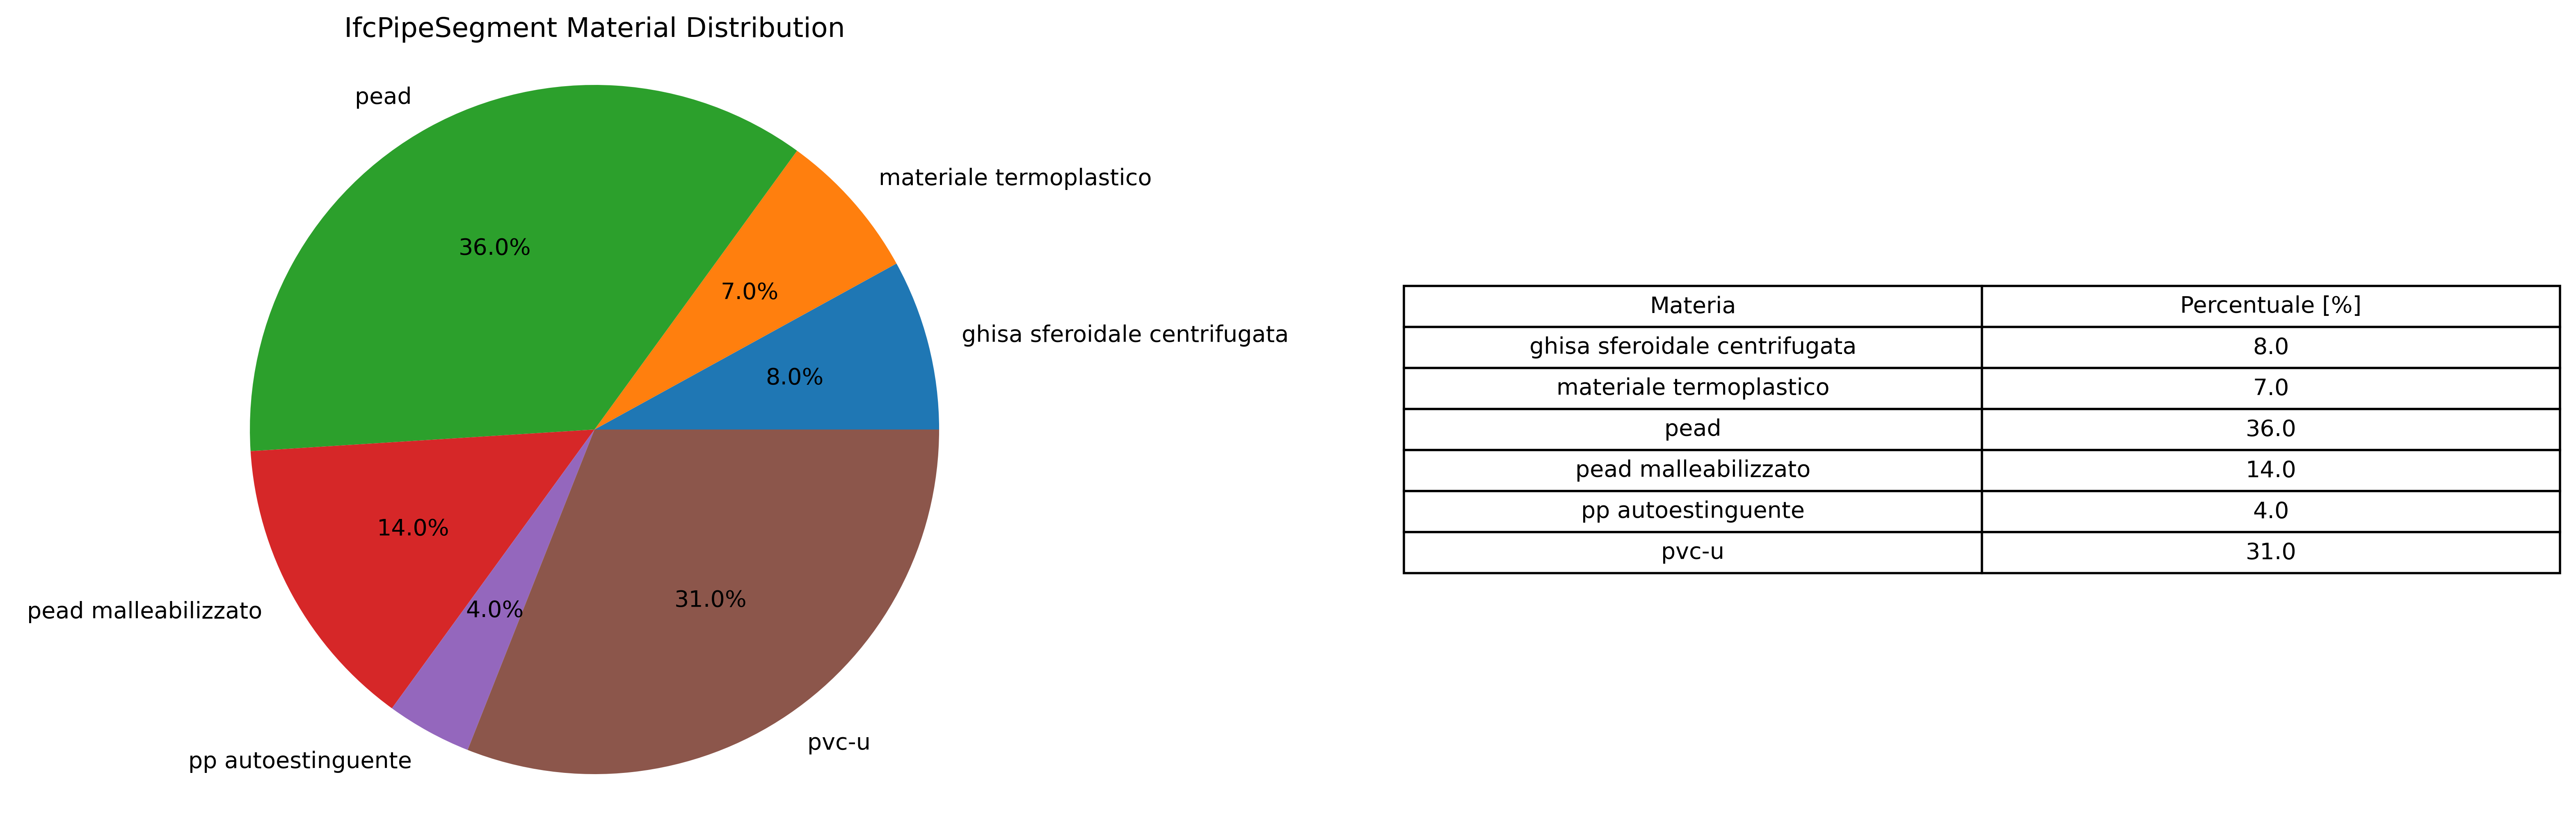

In [95]:
# Filter the data to include only relevant columns
filtered_data = dati[["IFC ENTITY", "MATERIA"]]

# Remove rows with NaN and "nd" values in PREZZO UNITARIO column
filtered_data = filtered_data.dropna(subset=["MATERIA"])
#filtered_data = filtered_data[~filtered_data["PREZZO UNITARIO"].isin(["nd"])]

# Filter entities to include only "IfcPipeSegment"
filtered_data_wall = filtered_data[filtered_data["IFC ENTITY"] == "IfcPipeSegment"]

# Get the material for IfcPipeSegment
material_wall = filtered_data_wall["MATERIA"]

grouped_materials = filtered_data_wall.groupby("MATERIA")

# Calcola il numero di occorrenze per ogni materiale
material_counts = grouped_materials.size()

# Calcola la percentuale di ogni materiale
material_percentages = ((material_counts / material_counts.sum()) * 100).round(0)

# Crea il DataFrame con i dati
df = pd.DataFrame({"Materia": material_percentages.index, "Percentuale [%]": material_percentages.values})

# Crea la griglia di subplot
plt.figure(figsize=(20, 6), dpi=400)

plt.subplot(1, 2, 1)  # Primo subplot nella prima colonna
plt.pie(material_percentages, labels=material_percentages.index, autopct='%1.1f%%')
plt.title("IfcPipeSegment Material Distribution")
plt.axis('equal')

plt.subplot(1, 2, 2)  # Secondo subplot nella seconda colonna
plt.axis('off')
tbl = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)

# Mostra il grafico e la tabella affiancati
plt.show()